In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
datafile=pd.read_csv('Bengaluru_House_Data1.csv')

In [3]:
datafile.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [4]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


# Here we can see total_sqft and price are object , we need to convert this column with the help of preprocessing , into float/int datatype

# Preprocessing -

# 1. Removing null values and duplicates

In [5]:
datafile.isnull().sum()/len(datafile)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [6]:
datafile.duplicated().sum()

511

In [7]:
datafile1=datafile.drop_duplicates()

# cleaning total_sqft column-

1. total_sqft contains '-' for range values and units also . So separating units and the calculating area on basis of sqfeet.

In [8]:
datafile1['Area']=datafile1['total_sqft'].str.replace('[a-zA-Z]','',regex=True)
datafile1['Unit']=datafile1['total_sqft'].str.replace('[0-9.-]','',regex=True)

In [9]:
datafile1['Unit'].value_counts()

            12563
              200
Sq Meter       17
Sq Yards       15
Acres           8
Cents           2
Guntha          2
Perch           1
Grounds         1
Name: Unit, dtype: int64

In [10]:
datafile1['Area'].value_counts()

1200    809
1100    210
1500    204
2400    196
600     178
       ... 
3532      1
2601      1
3329      1
906       1
4689      1
Name: Area, Length: 2112, dtype: int64

In [11]:
datafile1[datafile1['Area'].str.contains('-')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Area,Unit
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186,2100 - 2850,
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192,3010 - 3410,
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,? 224.50,2957 - 3450,
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,? 477.00,3067 - 8156,
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,? 54.01,1042 - 1105,
...,...,...,...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,Bhath N,850 - 1060,2.0,0.0,38.19,850 - 1060,
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122,1804 - 2273,
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.76,1200 - 1470,
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,NaN,NaN,52.57,1020 - 1130,


In [12]:
# function to split the string into float find average and convert into string finally.
def calculateAvg(string):
    list1=string.split("-")
    if len(list1)==2:
        avg=(float(list1[0])+float(list1[1]))/2
        return str(avg)

In [13]:
# Applying calculateAvg function on data containing '-'
datafile1['Area']=np.where(datafile1['Area'].str.contains("-"),datafile1['Area'].apply(calculateAvg),datafile1['Area'])
# Removing space at the ends
datafile1['Area']=datafile1['Area'].str.strip()
# Removing '.' in data ending with '.'
datafile1['Area']=np.where(datafile1['Area'].str.endswith('.'),datafile1['Area'].str.slice(0,-1,1),datafile1['Area'])
# converting area into float
datafile1['Area']=np.round(datafile1['Area'].astype(float),0)

In [14]:
datafile1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12809 entries, 0 to 13318
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12809 non-null  object 
 1   availability  12809 non-null  object 
 2   location      12808 non-null  object 
 3   size          12793 non-null  object 
 4   society       7474 non-null   object 
 5   total_sqft    12809 non-null  object 
 6   bath          12736 non-null  float64
 7   balcony       12204 non-null  float64
 8   price         12809 non-null  object 
 9   Area          12809 non-null  float64
 10  Unit          12809 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.2+ MB


In [15]:
datafile1.loc[13059] # Lookinf at data with - total_sqft  1200 - 1470  - and Area   1335.0

area_type       Super built-up  Area
availability           Ready To Move
location                      Harlur
size                           2 BHK
society                      Shodsir
total_sqft               1200 - 1470
bath                             2.0
balcony                          0.0
price                          72.76
Area                          1335.0
Unit                                
Name: 13059, dtype: object

In [16]:
# Converting area into sqfeet Unitwise

In [17]:
# Removing spaces from unit
datafile1['Unit']=datafile1['Unit'].str.replace(' ','')

In [107]:
def factorial(num):
    if num==0 or num==1:
        return 1
    else:
        return num*factorial(num-1)

factorial(5)

120

In [109]:
a='10.0'
b=float(a)
int(b)

10

In [115]:
a=12345
newnum=0
b=4
while(a!=0):
    new=a%10
    newnum+=new*(10**b)
    b-=1
    a//=10
    
print(newnum)

54321


In [18]:
datafile1['Unit'].value_counts()

           12763
SqMeter       17
SqYards       15
Acres          8
Cents          2
Guntha         2
Perch          1
Grounds        1
Name: Unit, dtype: int64

In [19]:
# Appling conversions according to units through np.select for multiple conditions
meter=(datafile1['Unit']=='SqMeter')
yard=(datafile1['Unit']=='SqYards')
Acre=(datafile1['Unit']=='Acres')
Cent=(datafile1['Unit']=='Cents')
Guntha=(datafile1['Unit']=='Guntha')
Perch=(datafile1['Unit']=='Perch')
Ground=(datafile1['Unit']=='Grounds')

conditionList=[meter,yard,Acre,Cent,Guntha,Perch,Ground]

conversionExp=[datafile1['Area']*10.76,datafile1['Area']*9,datafile1['Area']*43560,datafile1['Area']*435.56,
               datafile1['Area']*1089,datafile1['Area']*272.25,datafile1['Area']*2400]

datafile1['Area_Sqfeet']=np.select(conditionList,conversionExp,datafile1['Area'])

# Converting areasqfeet into int. 
datafile1['Area_Sqfeet']=np.round(datafile1['Area_Sqfeet'],0).astype(int)

In [20]:
# Dropping columns that are not required
datafile1.drop(['Area','Unit','total_sqft'],axis=1,inplace=True)

# Cleaning price column -

1. price also contains range values with '-' and symbols like $,€,?

In [21]:
# Removing symbols
datafile1['price']=datafile1['price'].str.replace('[$€?]','',regex=True)

# Appling calculateavg function for removing range values and getting mean
datafile1['price']=np.where(datafile1['price'].str.contains("-"),datafile1['price'].apply(calculateAvg),datafile1['price'])

# Converting price into float
datafile1['price']=np.round(datafile1['price'].astype(float),2)

# Dropping society column as 40% is np.nan values

In [22]:
datafile1.drop('society',axis=1,inplace=True)

In [23]:
datafile1.isnull().sum()

area_type         0
availability      0
location          1
size             16
bath             73
balcony         605
price             0
Area_Sqfeet       0
dtype: int64

# Removing nan values from location 

In [24]:
datafile1['location'].value_counts()

Whitefield                        524
Sarjapur  Road                    379
Electronic City                   290
Kanakpura Road                    249
Thanisandra                       229
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [25]:
datafile1['location'].replace(np.nan,'Unknown',inplace=True)

In [26]:
# Removing spaces
datafile1.location=datafile1.location.str.strip()

# Grouping location wise
location_stats=datafile1.groupby('location')['location'].agg('count').sort_values(ascending=False)

# Finding Locations with 10 or less than 10 counts
location_stats_less_than_10=location_stats[location_stats<=10]

# Assigning others to less frequent locations
datafile1.location=datafile1.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(datafile1.location.unique())

235

<AxesSubplot: xlabel='price', ylabel='Density'>

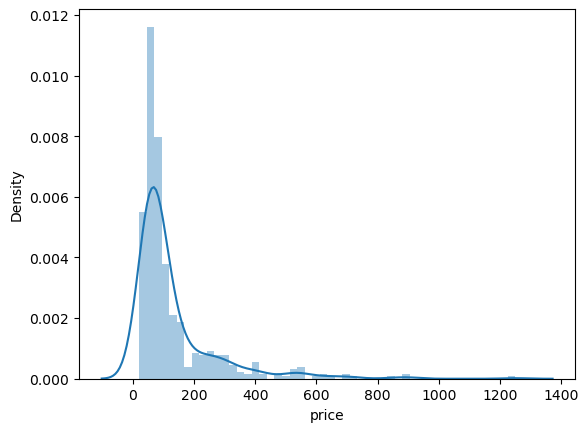

In [27]:
sns.distplot(datafile1[datafile1['location']=='Whitefield']['price'])

In [28]:
datafile1[datafile1['location']=='Whitefield']['price'].describe()

count     525.000000
mean      129.506914
std       142.500709
min        19.830000
25%        55.000000
50%        75.000000
75%       137.000000
max      1250.000000
Name: price, dtype: float64

<AxesSubplot: ylabel='price'>

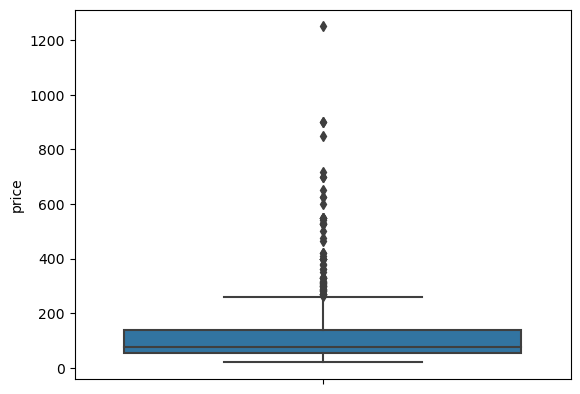

In [29]:
sns.boxplot(data=datafile1[datafile1['location']=='Whitefield'],y='price')

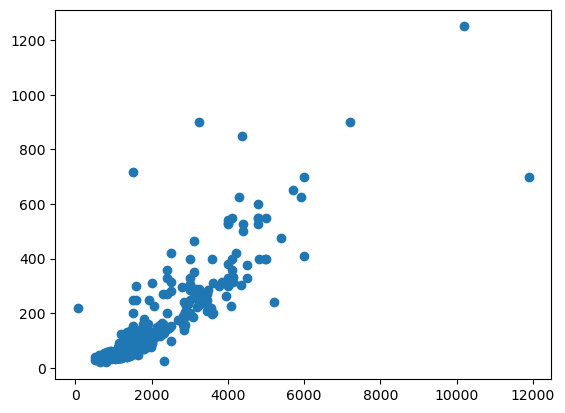

In [30]:
plt.scatter(data=datafile1[datafile1['location']=='Whitefield'],x='Area_Sqfeet',y='price')
# we could see price and area_sqfeet are linearly related

# Removing nan from size column and creating new feature BHK 

In [31]:
# Removing nan from size
datafile1['size'].replace(np.nan,'2 BHK',inplace=True)

# Creating BHK 
datafile1['BHK']=datafile1['size'].str.replace('[a-zA-Z]','',regex=True)
datafile1['BHK']=datafile1['BHK'].astype(int)
datafile1['BHK'].value_counts()

2     5272
3     4660
4     1398
1      640
5      350
6      221
7       99
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: BHK, dtype: int64

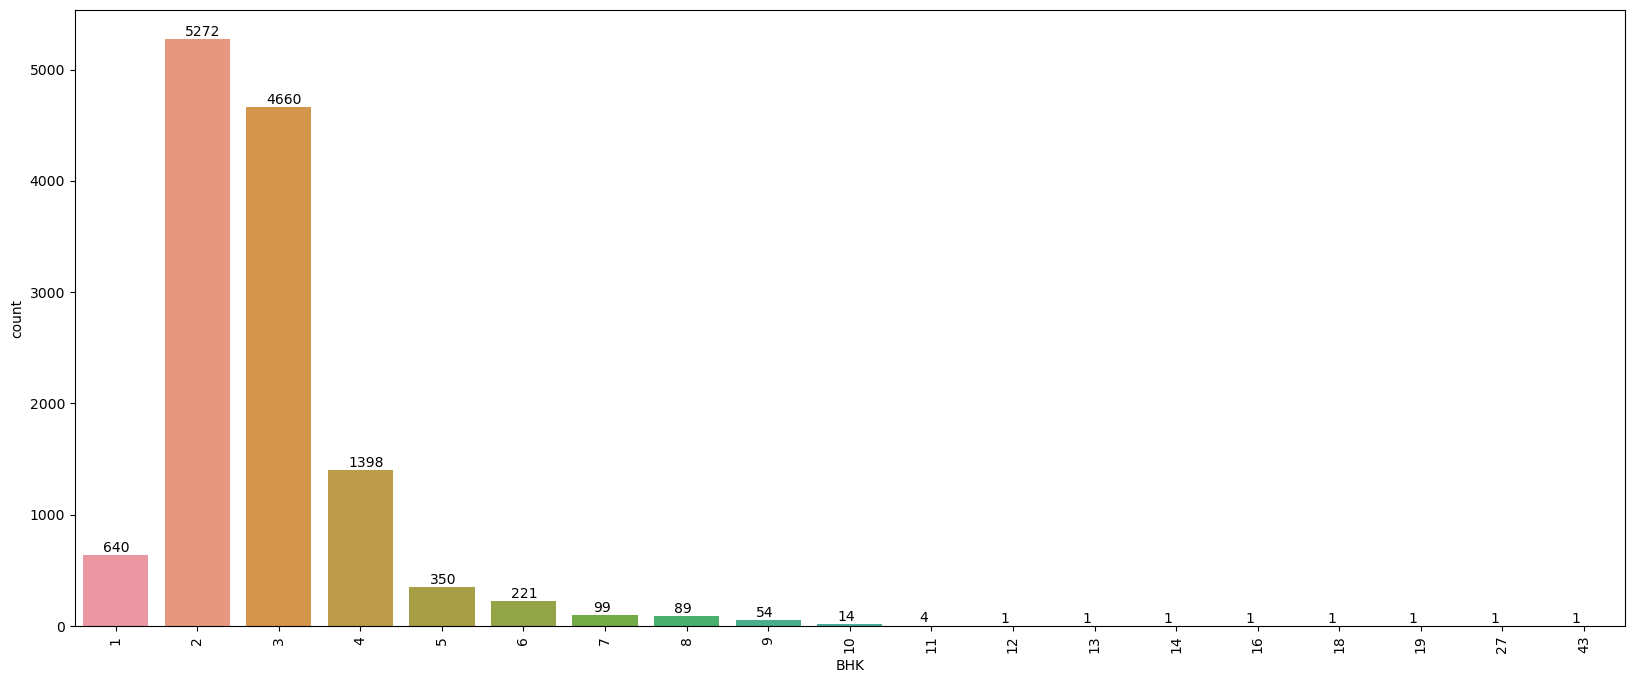

In [32]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'BHK', data = datafile1)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

# Filling nan values for bath column:

In [33]:
datafile1['bath'].value_counts()

2.0     6561
3.0     3181
4.0     1198
1.0      764
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [34]:
datafile1['bath'].fillna(datafile1['bath'].mode()[0],inplace=True)

# Filling nan values for balcony column:

In [35]:
datafile1['balcony'].value_counts()

2.0    4851
1.0    4712
3.0    1631
0.0    1010
Name: balcony, dtype: int64

In [36]:
datafile1['balcony'].fillna(datafile1['balcony'].mode()[0],inplace=True)

In [37]:
datafile1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12809 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12809 non-null  object 
 1   availability  12809 non-null  object 
 2   location      12809 non-null  object 
 3   size          12809 non-null  object 
 4   bath          12809 non-null  float64
 5   balcony       12809 non-null  float64
 6   price         12809 non-null  float64
 7   Area_Sqfeet   12809 non-null  int32  
 8   BHK           12809 non-null  int32  
dtypes: float64(3), int32(2), object(4)
memory usage: 1.4+ MB


In [38]:
# Fitering availability column
availableList=['Immediate Possession','Ready To Move']
datafile1.availability=datafile1.availability.apply(lambda x:'Under Construction' if x not in availableList else x)

In [39]:
datafile1['availability'].value_counts()

Ready To Move           10186
Under Construction       2607
Immediate Possession       16
Name: availability, dtype: int64

In [40]:
len(datafile1['location'].value_counts())

235

# we will remove outliers locationwise and BHK wise with IQR method as the data is skewed.

In [41]:
def remove_location_outliersIQR(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        Q1 = np.percentile(subdf.price,25)
        Q3 = np.percentile(subdf.price,75)
        IQR=Q3-Q1
        Upper_limit=Q3+(IQR*1.5)
        Lower_limit=Q1-(IQR*1.5)
        reduced_df = subdf[(subdf.price<Upper_limit) & (subdf.price>Lower_limit)]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

datafile2=remove_location_outliersIQR(datafile1)
datafile2.shape

(11748, 9)

In [42]:
# Removing outliers BHKwise:
def remove_bhk_outliersIQR(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        for bhk,bhkdf in subdf.groupby('BHK'):
            Q1 = np.percentile(bhkdf.price,25)
            Q3 = np.percentile(bhkdf.price,75)
            IQR=Q3-Q1
            Upper_limit=Q3+(IQR*1.5)
            Lower_limit=Q1-(IQR*1.5)
            reduced_df = bhkdf[(bhkdf.price<Upper_limit) & (bhkdf.price>Lower_limit)]
            df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

datafile3=remove_bhk_outliersIQR(datafile2)
datafile3.shape

(10960, 9)

<AxesSubplot: ylabel='price'>

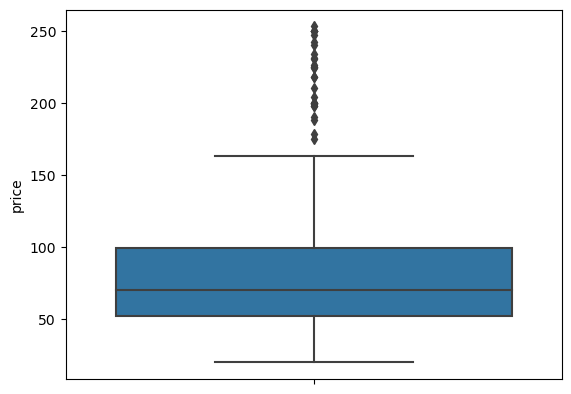

In [43]:
sns.boxplot(data=datafile3[datafile3['location']=='Whitefield'],y='price')

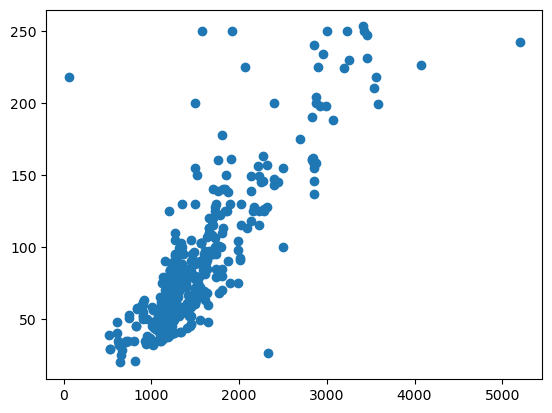

In [44]:
plt.scatter(data=datafile3[datafile3['location']=='Whitefield'],x='Area_Sqfeet',y='price')

# Removing data where no of bath>no of BHK+2

In [45]:
oulierIndex=datafile3[datafile3.bath>datafile3.BHK+2].index
datafile3.drop(oulierIndex,inplace=True,axis=0)

# Removing data where no of bath>10

In [46]:
oulierIndex2=datafile3[datafile3.bath>10].index
datafile3.drop(oulierIndex2,inplace=True,axis=0)

# Dropping dupicate data

In [47]:
datafile3.shape

(10954, 9)

In [48]:
datafile3.duplicated().sum()

205

In [49]:
datafile3.drop_duplicates(inplace=True)

In [50]:
datafile3.shape

(10749, 9)

# dropping size column as we had extracted BHK from it

In [51]:
datafile3.drop('size',axis=1,inplace=True)

<AxesSubplot: >

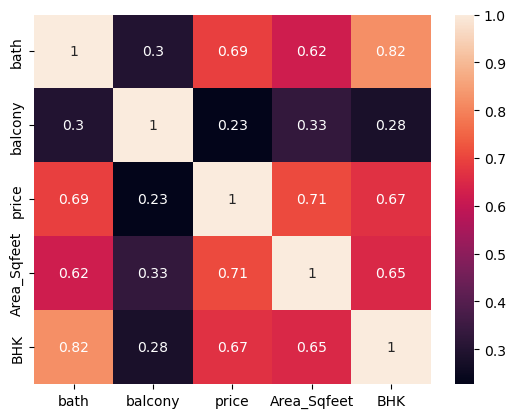

In [52]:
sns.heatmap(datafile3.corr(method='spearman'),annot=True)# data is not normalise

<AxesSubplot: >

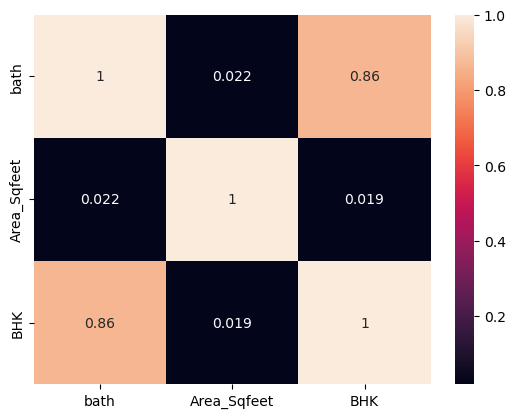

In [53]:
sns.heatmap(datafile3[['bath','Area_Sqfeet','BHK']].corr(),annot=True)

# we can drop BHK and balcony as balcony is very less correlated to price and BHK is highly correlated to bath.

In [54]:
datafile3.head()

,area_type,availability,location,bath,balcony,price,Area_Sqfeet,BHK
0,Super built-up Area,Ready To Move,1st Block Jayanagar,3.0,2.0,60.0,1000,2
1,Super built-up Area,Under Construction,1st Block Jayanagar,2.0,2.0,148.0,1235,2
2,Super built-up Area,Under Construction,1st Block Jayanagar,3.0,2.0,194.0,1630,3
3,Super built-up Area,Ready To Move,1st Block Jayanagar,2.0,3.0,235.0,1875,3
4,Built-up Area,Under Construction,1st Block Jayanagar,2.0,0.0,130.0,1200,3


# Label encoding :

In [55]:
datafile3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10749 entries, 0 to 10958
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10749 non-null  object 
 1   availability  10749 non-null  object 
 2   location      10749 non-null  object 
 3   bath          10749 non-null  float64
 4   balcony       10749 non-null  float64
 5   price         10749 non-null  float64
 6   Area_Sqfeet   10749 non-null  int32  
 7   BHK           10749 non-null  int32  
dtypes: float64(3), int32(2), object(3)
memory usage: 671.8+ KB


In [56]:
datafile3['BHK']=datafile3['BHK'].astype(int)

In [57]:
datafile3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10749 entries, 0 to 10958
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10749 non-null  object 
 1   availability  10749 non-null  object 
 2   location      10749 non-null  object 
 3   bath          10749 non-null  float64
 4   balcony       10749 non-null  float64
 5   price         10749 non-null  float64
 6   Area_Sqfeet   10749 non-null  int32  
 7   BHK           10749 non-null  int32  
dtypes: float64(3), int32(2), object(3)
memory usage: 671.8+ KB


In [58]:
datafile3['area_type'].value_counts()

Super built-up  Area    7489
Built-up  Area          1989
Plot  Area              1192
Carpet  Area              79
Name: area_type, dtype: int64

In [59]:
datafile3['availability'].value_counts(normalize=True)

Ready To Move           0.792167
Under Construction      0.206903
Immediate Possession    0.000930
Name: availability, dtype: float64

In [60]:
datafile3=pd.get_dummies(columns=['area_type','availability','location'],data=datafile3,drop_first=True)

In [61]:
datafile3.shape

(10749, 244)

# Now modelling data :

In [62]:
x1=datafile3.drop(['price'],axis=1)
y1=datafile3['price']

In [63]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
sc_x1 = StandardScaler()
x1[['bath','balcony','Area_Sqfeet','BHK']] = sc_x1.fit_transform(x1[['bath','balcony','Area_Sqfeet','BHK']])

In [64]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=101)

# OLS method

In [65]:
# building OLS model
import statsmodels.regression.linear_model as smf
from statsmodels.regression.linear_model import OLS

In [66]:
import statsmodels.api as sm
x2=sm.add_constant(x1)

In [67]:
x1.head()

,bath,balcony,Area_Sqfeet,BHK,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,availability_Under Construction,location_1st Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,0.472178,0.511225,-0.043498,-0.638005,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.499570,0.511225,-0.027102,-0.638005,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.472178,0.511225,0.000457,0.347328,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.499570,1.770717,0.017551,0.347328,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.499570,-2.007758,-0.029544,0.347328,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
OLSmodel=smf.OLS(endog=y1,exog=x2).fit()
OLSmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     76.24
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:52:52   Log-Likelihood:                -55044.
No. Observations:               10749   AIC:                         1.106e+05
Df Residuals:                   10505   BIC:                         1.124e+05
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  154.7008     17.744      8.718      0.000     119.919     189.483
bath                                    21.0756      0.833     25.313      0.000      19.444      22.708
balcony                                  1.7638      0.441      4.002      0.000       0.900       2.628
Area_Sqfeet                              0.6237      0.400      1.559      0.119      -0.161       1.408
BHK                                      9.4237      0.837     11.259      0.000       7.783      11.064
area_type_Carpet  Area                   1.1995      4.793      0.250      0.802      -8.196      10.595
area_type_Plot  Area                    10.2337      1.680      6.092      0.000       6.941      13.526
area_type_Super built-up  Area           0.7416      1.093      0.679      0.497      -1.401       2.884
availability_Ready To Move              42.2198     13.196      3.199      0.001      16.352      68.087
availability_Under Construction         40.9612     13.226      3.097      0.002      15.036      66.886
location_1st Phase JP Nagar            -54.0772     14.741     -3.669      0.000     -82.971     -25.183
location_2nd Stage Nagarbhavi          -58.4716     15.504     -3.771      0.000     -88.863     -28.081
location_5th Block Hbr Layout          -79.8971     18.734     -4.265      0.000    -116.619     -43.175
location_5th Phase JP Nagar           -123.0035     14.178     -8.676      0.000    -150.795     -95.212
location_6th Phase JP Nagar            -93.4585     15.148     -6.170      0.000    -123.152     -63.765
location_7th Phase JP Nagar           -106.7857     12.429     -8.592      0.000    -131.149     -82.422
location_8th Phase JP Nagar           -133.5768     13.278    -10.060      0.000    -159.605    -107.549
location_9th Phase JP Nagar           -134.5955     13.836     -9.728      0.000    -161.717    -107.474
location_AECS Layout                  -126.7512     18.113     -6.998      0.000    -162.256     -91.246
location_Abbigere                     -152.8766     15.137    -10.099      0.000    -182.548    -123.205
location_Akshaya Nagar                -125.1059     13.159     -9.507      0.000    -150.900     -99.312
location_Ambalipura                    -96.7879     14.518     -6.667      0.000    -125.247     -68.329
location_Ambedkar Nagar                -99.2571     15.024     -6.606      0.000    -128.708     -69.807
location_Amruthahalli                 -122.7764     15.314     -8.017      0.000    -152.795     -92.757
location_Anandapura                   -136.7698     14.753     -9.271      0.000    -165.689    -107.851
location_Ananth Nagar                 -153.6389     14.741    -10.422      0.000    -182.535    -124.743
location_Anekal                       

# P(>|t|): 
This is the p-value associated with the model coefficients. Since the p-value for variables is less than .05, we can say that there is a statistically significant association between independent variables and dependent variables.

# R-squared: 
This tells us the percentage of the variation in the price that can be explained by the independent variables. In this case, 73.5 % of the variation in scores can be explained hours studied.

# The F-statistic (135.7) and the corresponding p-value :
the ratio of mean squared error of the model to the mean squared error of residuals.
They tell us the overall significance of the regression model, i.e. whether predictor variables in the model are useful for explaining the variation in the response variable.


# Durbin-Watson:	1.513
so range between 1.5 and 2.5 means there is no autorelation.The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical model or regression analysis. The Durbin-Watson statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no autocorrelation detected in the sample. Values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 means negative autocorrelation.
A rule of thumb is that DW test statistic values in the range of 1.5 to 2.5 are relatively normal. Values outside this range could, however, be a cause for concern. The Durbin–Watson statistic, while displayed by many regression analysis programs, is not applicable in certain situations.

In general, the larger the R-squared value, the more precisely the predictor variables are able to predict the value of the response variable

# Assumptions of Linear Regression:
    1. Linear relationship : we could see that as area increases price also increases,so The relationship between the 
                             dependent and independent variables is linear.
    2. No multicollinearity.(features with probability value>0.05 have been dropped in model 3.
    3. Homoscedasticity - the residuals are equal across the regression line(checked by scatter plot after modelling)
    4. No auto-correlation - Autocorrelation occurs when the residuals are not independent from each other. 
                         Durbin-Watson’s d tests the null hypothesis that the residuals are not linearly auto-correlated.
                         As a rule of thumb values of 1.5 < d < 2.5 show that there is no auto-correlation in the data.
                         From OLS we could see DWT is above 1.5.
    5. Endogenity:- Endogenic variable is Dependent variable ; Exogenic variable are Independent variable.
                If endogenic variable not chosen corretly, it causes problem.Dependent variable should be continous.
    6. Normality : -Errors follow the normal distributio (checked by distplot/histogram)

# Comparing models :

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error,r2_score

In [70]:
seed=24
linear = LinearRegression()
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
hist = HistGradientBoostingRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

In [71]:
models = [linear, lasso, ridge, elnt, dt, svm, knn, rf, et, hist, gb, xgb, lgb]
training_score = []
test_score=[]
mse=[]
for model in models:
    model.fit(x1_train, y1_train)
    trainpred=model.predict(x1_train)
    testpred=model.predict(x1_test)
    training_score.append(model.score( x1_train,y1_train))
    test_score.append(model.score( x1_test,y1_test))
    mse.append(mean_squared_error(y1_test,testpred))
        
    

In [72]:
train_score = pd.DataFrame(data = {'Training_R2':training_score,'Test_R2':test_score,'MSE':mse}, 
                           columns = ['Training_R2','Test_R2','MSE'])
train_score.index = ['Linear Regression', 'Lasso', 'RIDGE','ElasticNet', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 
                     'Extra Tree', 'HIST Gradient Boosting', 'Gradient Boosting', 'XGB', 'LightGB']

In [73]:
train_score.sort_values(by='Test_R2',ascending=False)

,Training_R2,Test_R2,MSE
XGB,0.903705,0.799461,870.944578
Random Forest,0.964259,0.785004,933.731199
Gradient Boosting,0.812475,0.773499,983.697488
Extra Tree,0.991197,0.741615,1122.173446
HIST Gradient Boosting,0.791136,0.734504,1153.055169
LightGB,0.791143,0.722515,1205.124312
KNN,0.781598,0.689857,1346.959255
Decision Tree,0.991197,0.650274,1518.867182
RIDGE,0.635507,0.620986,1646.068241
Linear Regression,0.639464,0.620562,1647.909109


# Visualising prediction

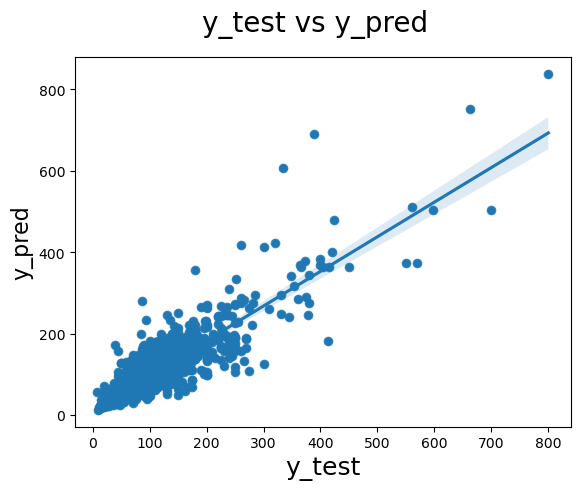

In [74]:
fig = plt.figure()
testpredXGB=xgb.predict(x1_test)
sns.scatterplot(x = y1_test, y = testpredXGB)
sns.regplot(x = y1_test, y=testpredXGB)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.show()

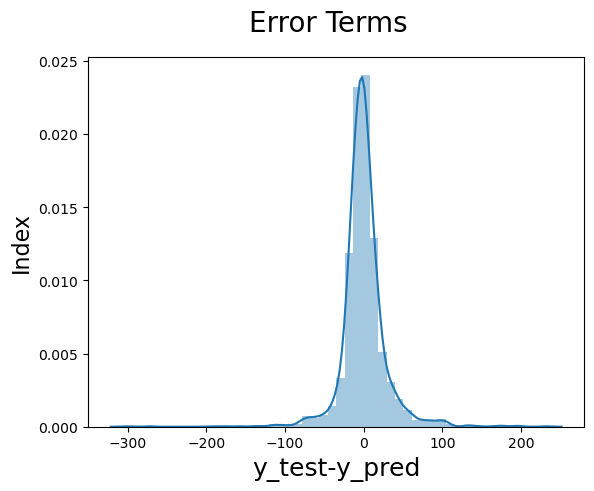

In [75]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y1_test-testpredXGB),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

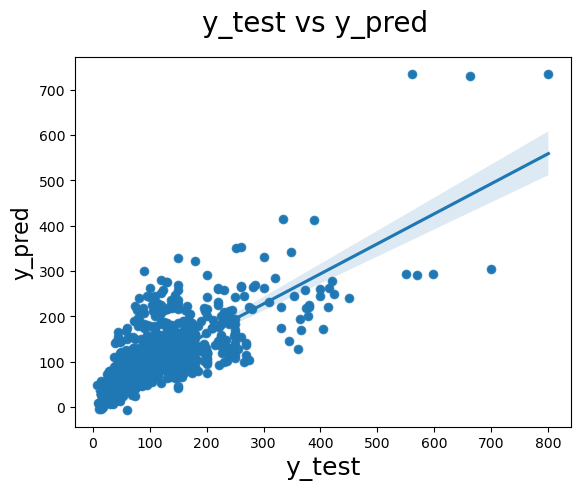

In [76]:
fig = plt.figure()
testpredlr=linear.predict(x1_test)
sns.scatterplot(x = y1_test, y = testpredlr)
sns.regplot(x = y1_test, y=testpredlr)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

Text(0, 0.5, 'Index')

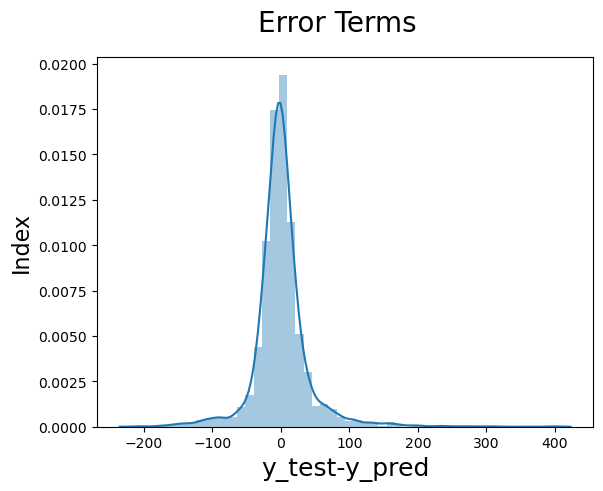

In [77]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y1_test-testpredlr),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

# Feature selection and then evaluating models -

# Using Select From Model

In [78]:
from sklearn.feature_selection import SelectFromModel

sfm=SelectFromModel(rf)
sfm.fit(x1,y1)


SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, random_state=24))

In [79]:
print("Benchmark average significant value of feature important: ", np.mean(sfm.estimator_.feature_importances_))

Benchmark average significant value of feature important:  0.004115226337448559


In [80]:
sfm.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [81]:
feature_selected_sfm=x1.columns[sfm.get_support()]
feature_selected_sfm

Index(['bath', 'balcony', 'Area_Sqfeet', 'BHK', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'availability_Ready To Move',
       'location_BTM 2nd Stage', 'location_Banashankari Stage II',
       'location_Benson Town', 'location_Cooke Town',
       'location_Cunningham Road', 'location_Frazer Town',
       'location_Giri Nagar', 'location_HAL 2nd Stage', 'location_Hebbal',
       'location_Indira Nagar', 'location_Kodihalli', 'location_Koramangala',
       'location_Malleshwaram', 'location_Rajaji Nagar', 'location_other'],
      dtype='object')

In [82]:
len(feature_selected_sfm)

22

In [83]:
x1_final=x1[feature_selected_sfm]
x1_final.head()

,bath,balcony,Area_Sqfeet,BHK,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_BTM 2nd Stage,location_Banashankari Stage II,location_Benson Town,...,location_Frazer Town,location_Giri Nagar,location_HAL 2nd Stage,location_Hebbal,location_Indira Nagar,location_Kodihalli,location_Koramangala,location_Malleshwaram,location_Rajaji Nagar,location_other
0,0.472178,0.511225,-0.043498,-0.638005,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.499570,0.511225,-0.027102,-0.638005,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.472178,0.511225,0.000457,0.347328,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.499570,1.770717,0.017551,0.347328,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.499570,-2.007758,-0.029544,0.347328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
x1_final.head()

,bath,balcony,Area_Sqfeet,BHK,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_BTM 2nd Stage,location_Banashankari Stage II,location_Benson Town,...,location_Frazer Town,location_Giri Nagar,location_HAL 2nd Stage,location_Hebbal,location_Indira Nagar,location_Kodihalli,location_Koramangala,location_Malleshwaram,location_Rajaji Nagar,location_other
0,0.472178,0.511225,-0.043498,-0.638005,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.499570,0.511225,-0.027102,-0.638005,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.472178,0.511225,0.000457,0.347328,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.499570,1.770717,0.017551,0.347328,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.499570,-2.007758,-0.029544,0.347328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
models2 = [linear, lasso, ridge, elnt, dt, svm, knn, rf, et, hist, gb, xgb, lgb]
training_score2 = []
test_score2=[]
mse2=[]

#from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x1_final, y1, test_size=0.2, random_state=101)
for model in models2:
    model.fit(x2_train, y2_train)
    trainpred=model.predict(x2_train)
    testpred=model.predict(x2_test)
    training_score2.append(model.score( x2_train,y2_train))
    test_score2.append(model.score( x2_test,y2_test))
    mse2.append(mean_squared_error(y2_test,testpred))

    
train_score2 = pd.DataFrame(data = {'Training_R2':training_score2,'Test_R2':test_score2,'MSE':mse2}, 
                           columns = ['Training_R2','Test_R2','MSE'])
train_score2.index = ['Linear Regression', 'Lasso', 'RIDGE','ElasticNet', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 
                     'Extra Tree', 'HIST Gradient Boosting', 'Gradient Boosting', 'XGB', 'LightGB']
    
train_score2.sort_values(by='Test_R2',ascending=False)

,Training_R2,Test_R2,MSE
XGB,0.901030,0.781316,949.748107
Gradient Boosting,0.807605,0.766948,1012.151471
Random Forest,0.944681,0.745295,1106.188863
HIST Gradient Boosting,0.785759,0.711512,1252.909197
LightGB,0.785646,0.710832,1255.863587
Extra Tree,0.970917,0.707132,1271.934582
KNN,0.742401,0.656955,1489.852777
Decision Tree,0.970918,0.609955,1693.975544
RIDGE,0.562270,0.553458,1939.344437
Linear Regression,0.563906,0.550997,1950.030348


# Using SelectFromModel we have reduced the features to 22 without much effect in accuracy.

# Conclusion -

The best models for this House Price Prediction - Regression ML Model are:

        1. Gradient Boosting	2. HIST Gradient Boosting	3. LightGB   
        
in other models are suffering high variance and high bias problem.

# 2. Using SelectKBest with f_regression(f test of Anova)

In [86]:
from sklearn.feature_selection import f_regression, SelectKBest

fs = SelectKBest(score_func=f_regression)
# Applying feature selection
fit = fs.fit(x1,y1)
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x1.columns)
feature_score = pd.concat([features,features_score],axis=1)
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

                     Input_Features      F_Score
0                              bath  4770.995901
3                               BHK  3587.525638
71         location_Cunningham Road  1091.592385
197           location_Rajaji Nagar   767.141857
5              area_type_Plot  Area   585.320054
1                           balcony   282.543169
151              location_Kodihalli   268.463973
118           location_Indira Nagar   204.786558
86             location_Frazer Town   173.424227
6    area_type_Super built-up  Area   160.554315
49             location_Benson Town   158.789543
170           location_Malleshwaram   146.785885
95           location_HAL 2nd Stage   114.873344
117          location_Iblur Village   105.775057
83         location_Electronic City    85.267797


# Feature Selection By Backward Elimination-


In [87]:
# features with probability >0.05 from OLS model:
selected_features=['Area_Sqfeet','area_type_CarpetArea','area_type_Super built-up Area','location_Cooke Town',
                  'location_Doddaballapur','location_Frazer Town','location_Giri Nagar','location_Iblur Village',
                  'location_Malleshwaram','location_Sector 7 HSR Layout']

In [88]:
x2.shape

(10749, 244)

In [89]:
x2.head()

,const,bath,balcony,Area_Sqfeet,BHK,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,availability_Under Construction,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1.0,0.472178,0.511225,-0.043498,-0.638005,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,-0.499570,0.511225,-0.027102,-0.638005,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.472178,0.511225,0.000457,0.347328,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,-0.499570,1.770717,0.017551,0.347328,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,-0.499570,-2.007758,-0.029544,0.347328,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [90]:
x4=x2.drop(['Area_Sqfeet','location_Cooke Town','location_Doddaballapur','location_Frazer Town','location_Giri Nagar',
         'location_Iblur Village', 'location_Malleshwaram','location_Sector 7 HSR Layout'],1)

In [91]:
x4.drop(x4.columns[[4,6]],axis=1,inplace=True)

In [92]:
OLSmodel=smf.OLS(endog=y1,exog=x4).fit()
OLSmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     79.20
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:54:48   Log-Likelihood:                -55061.
No. Observations:               10749   AIC:                         1.106e+05
Df Residuals:                   10515   BIC:                         1.123e+05
Df Model:                         233                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  161.7358     13.638     11.860      0.000     135.004     188.468
bath                                    21.0984      0.830     25.406      0.000      19.471      22.726
balcony                                  1.8306      0.438      4.184      0.000       0.973       2.688
BHK                                      9.3675      0.835     11.222      0.000       7.731      11.004
area_type_Plot  Area                     9.6140      1.521      6.319      0.000       6.632      12.596
availability_Ready To Move              42.2382     13.208      3.198      0.001      16.348      68.128
availability_Under Construction         41.0849     13.235      3.104      0.002      15.143      67.027
location_1st Phase JP Nagar            -60.5647      9.359     -6.471      0.000     -78.910     -42.220
location_2nd Stage Nagarbhavi          -64.9267     10.535     -6.163      0.000     -85.577     -44.277
location_5th Block Hbr Layout          -86.3430     14.891     -5.798      0.000    -115.532     -57.154
location_5th Phase JP Nagar           -129.5934      8.450    -15.336      0.000    -146.157    -113.029
location_6th Phase JP Nagar           -100.0686      9.995    -10.012      0.000    -119.660     -80.477
location_7th Phase JP Nagar           -113.2539      4.983    -22.730      0.000    -123.021    -103.487
location_8th Phase JP Nagar           -140.0451      6.859    -20.417      0.000    -153.490    -126.600
location_9th Phase JP Nagar           -141.1507      7.888    -17.894      0.000    -156.613    -125.688
location_AECS Layout                  -133.1157     14.086     -9.450      0.000    -160.726    -105.505
location_Abbigere                     -159.2692      9.994    -15.937      0.000    -178.859    -139.680
location_Akshaya Nagar                -131.6173      6.595    -19.958      0.000    -144.544    -118.691
location_Ambalipura                   -103.2895      9.018    -11.454      0.000    -120.966     -85.613
location_Ambedkar Nagar               -105.6053      9.769    -10.810      0.000    -124.755     -86.455
location_Amruthahalli                 -129.3280     10.239    -12.631      0.000    -149.399    -109.257
location_Anandapura                   -143.2349      9.380    -15.270      0.000    -161.621    -124.849
location_Ananth Nagar                 -160.1651      9.370    -17.093      0.000    -178.533    -141.797
location_Anekal                       -148.3677      8.894    -16.683      0.000    -165.801    -130.935
location_Anjanapura                   -146.0244     11.469    -12.732      0.000    -168.507    -123.542
location_Ardendale                    -106.4523      9.554    -11.142      0.000    -125.180     -87.725
location_Arekere                      

# Now we can use this data to implement in comparing models

In [93]:
x4.shape

(10749, 234)

In [94]:
x4.drop('const',1,inplace=True)

In [95]:
models3 = [linear, lasso, ridge, elnt, dt, svm, knn, rf, et, hist, gb, xgb, lgb]
training_score3 = []
test_score3=[]
mse3=[]

#from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x4, y1, test_size=0.2, random_state=141)
for model in models3:
    model.fit(x3_train, y3_train)
    trainpred=model.predict(x3_train)
    testpred=model.predict(x3_test)
    training_score3.append(model.score( x3_train,y3_train))
    test_score3.append(model.score( x3_test,y3_test))
    mse3.append(mean_squared_error(y3_test,testpred))

    
train_score3 = pd.DataFrame(data = {'Training_R2':training_score3,'Test_R2':test_score3,'MSE':mse3}, 
                           columns = ['Training_R2','Test_R2','MSE'])
train_score3.index = ['Linear Regression', 'Lasso', 'RIDGE','ElasticNet', 'Decision Tree', 'SVM', 'KNN', 'Random Forest', 
                     'Extra Tree', 'HIST Gradient Boosting', 'Gradient Boosting', 'XGB', 'LightGB']
    
train_score3.sort_values(by='Test_R2',ascending=False)

,Training_R2,Test_R2,MSE
XGB,0.755474,0.686794,1857.960180
Gradient Boosting,0.662690,0.656444,2037.999225
Linear Regression,0.625249,0.652190,2063.234335
RIDGE,0.604650,0.633993,2171.179653
Random Forest,0.838788,0.632177,2181.948960
Extra Tree,0.879587,0.606649,2333.383971
Decision Tree,0.879587,0.566960,2568.820331
LightGB,0.578453,0.514936,2877.435799
HIST Gradient Boosting,0.578453,0.514936,2877.435799
KNN,0.605642,0.488711,3033.003737


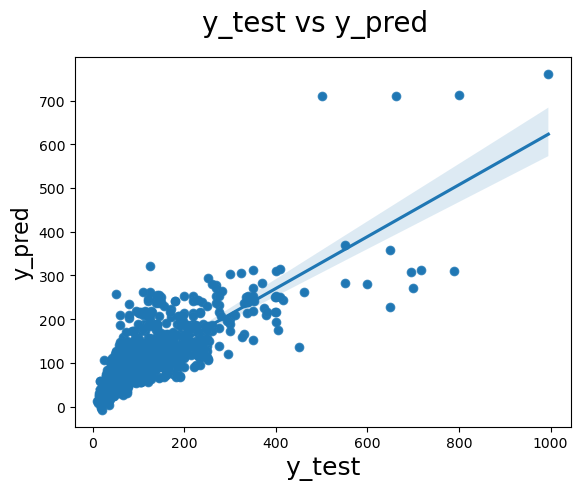

In [96]:
fig = plt.figure()
testpredlr2=linear.predict(x3_test)
sns.scatterplot(x = y3_test, y = testpredlr2)
sns.regplot(x = y3_test, y=testpredlr2)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  
plt.show()

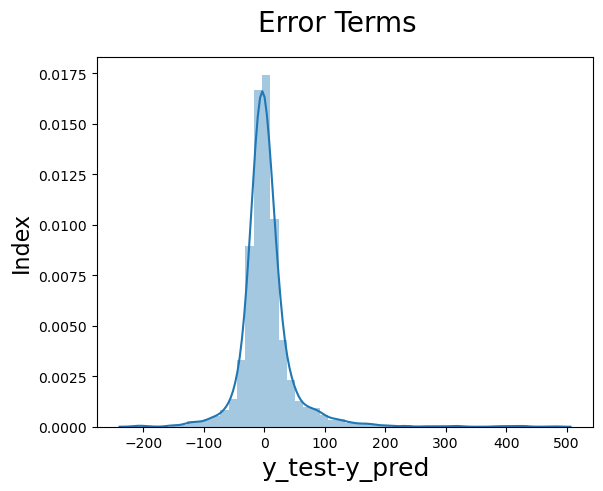

In [97]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y3_test-testpredlr2),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

# After backward elimination

# Conclusion -

The best performing models are -

        1.XGB  2. Gradient Boosting   3. Linear Regression   4. RIDGE
        
This model can be used with maximum features to utilise for locationwise price prediction, though Mean squared error has increased.

# ********End Of Project***********

# Dipti Sehit


In [98]:
from sklearn import tree

dt2=DecisionTreeRegressor(ccp_alpha=6)
dt2.fit(x3_train, y3_train)
text_representation = tree.export_text(dt2)
#print(text_representation)

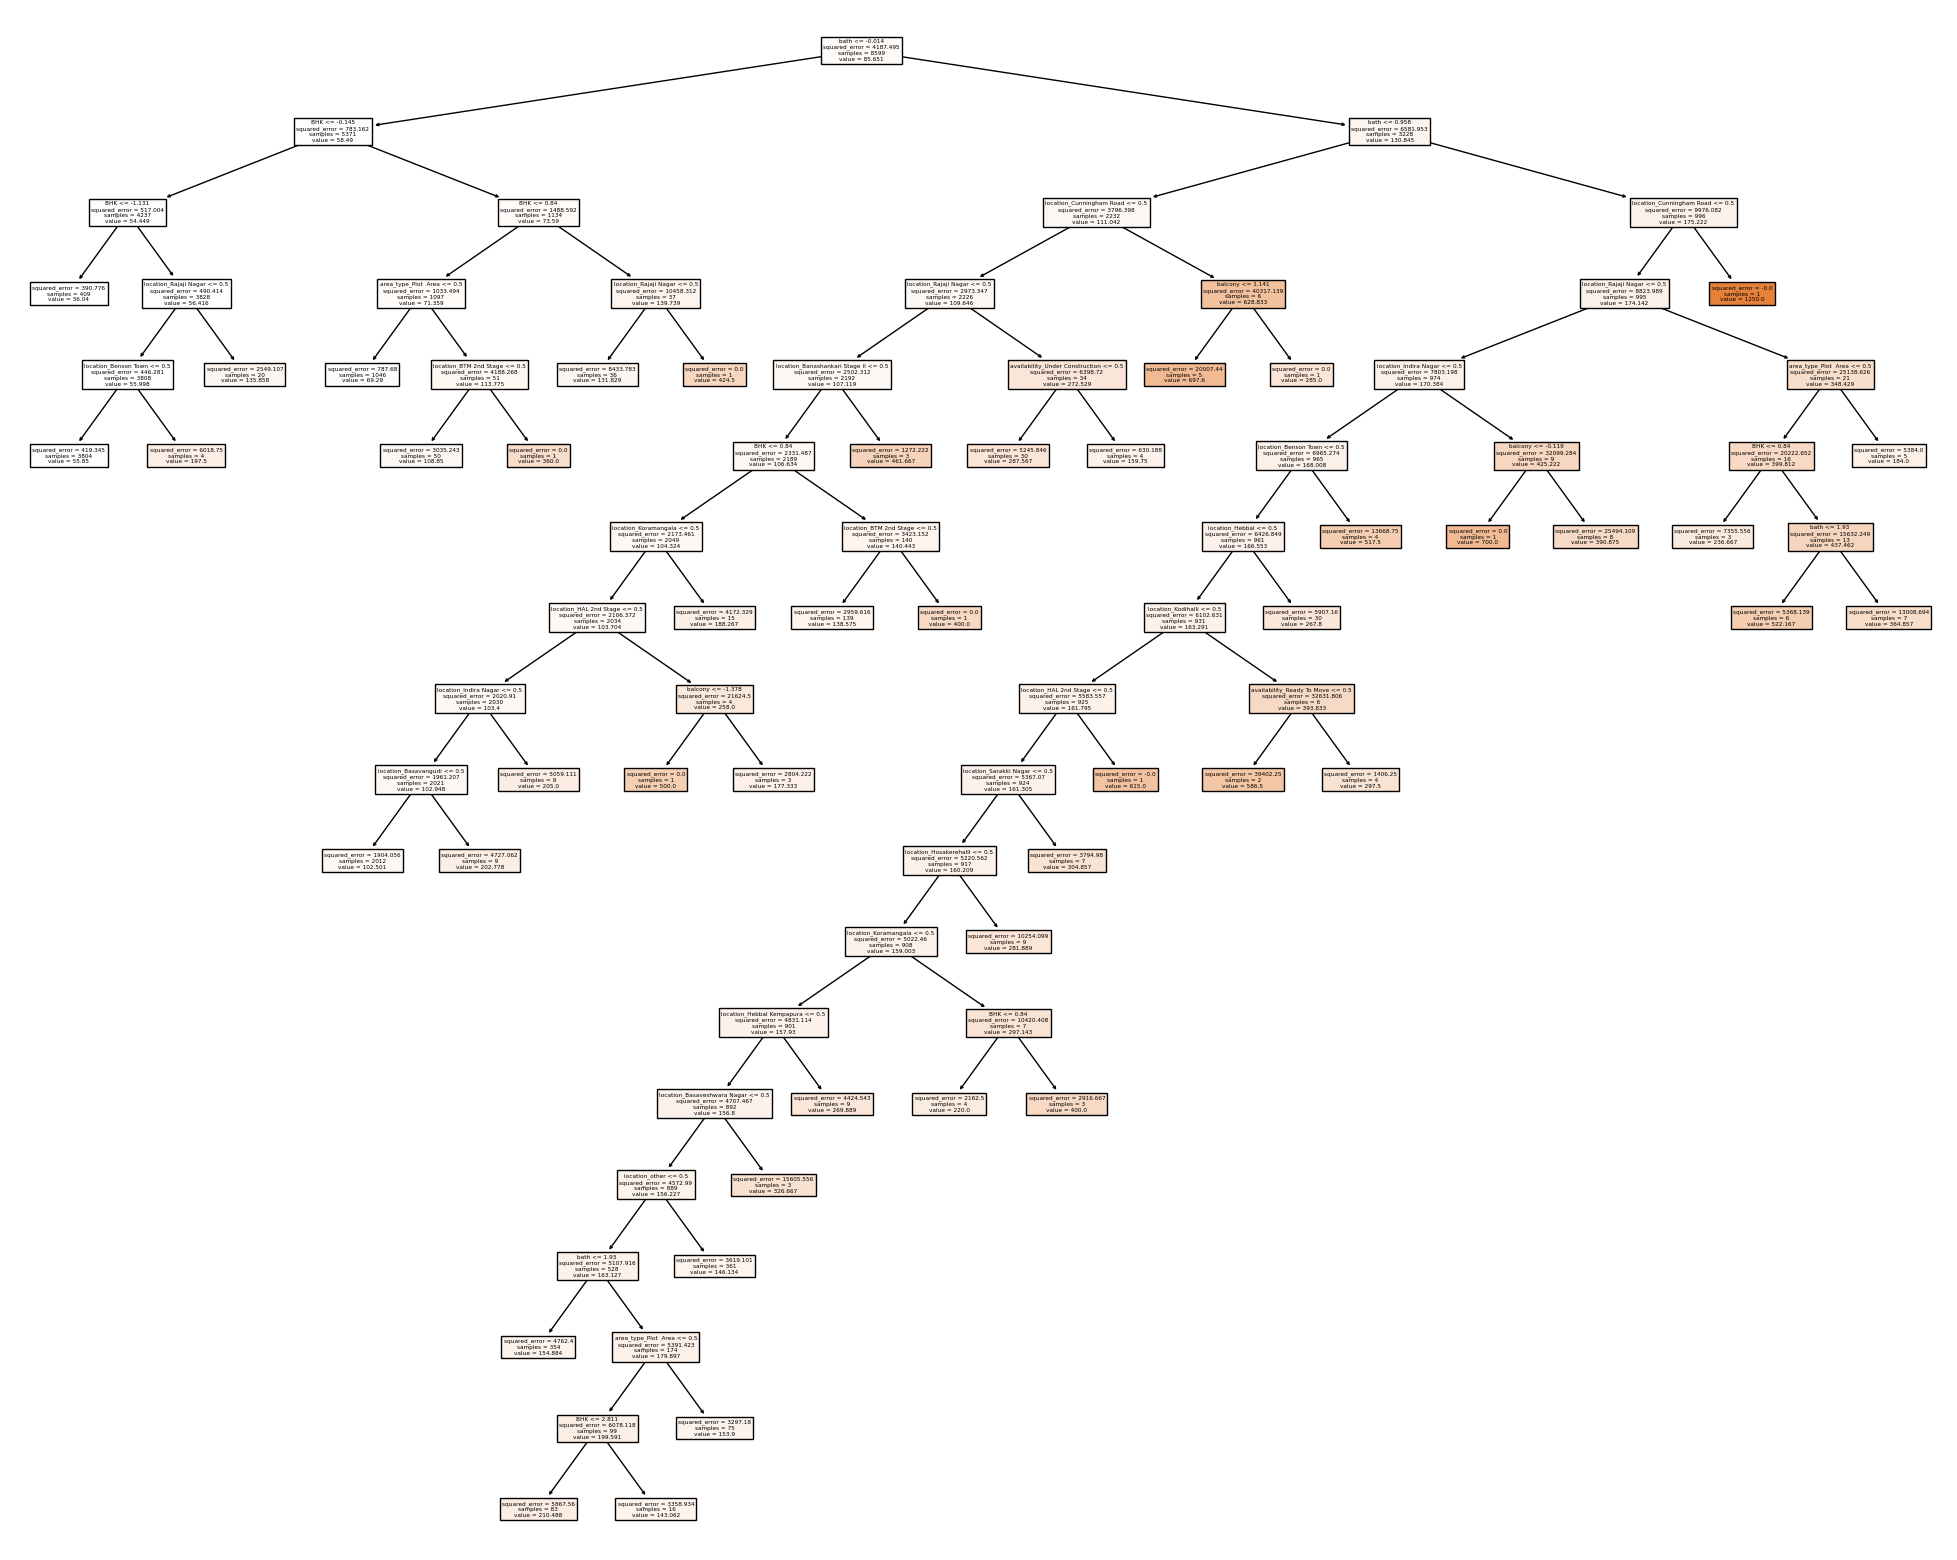

In [99]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt2, feature_names=dt.feature_names_in_, filled=True)

In [100]:
trainpred=dt2.predict(x3_train)
testpred=dt2.predict(x3_test)

training_score3=dt2.score( x3_train,y3_train)
test_score3=dt2.score( x3_test,y3_test)
#mse3=mean_squared_error(x3_test,testpred)
print(training_score3,test_score3)

0.6536802682855427 0.651422392829043


In [101]:
path=dt.cost_complexity_pruning_path(x3_train,y3_train)
alphas=path['ccp_alphas']
alphas

array([0.00000000e+00, 4.23272528e-16, 2.16188763e-13, ...,
       1.87578267e+02, 3.29899661e+02, 1.22751081e+03])

In [102]:
len(alphas)

1610

In [103]:
#from sklearn.metrics import accuracy_score
accuracy_train,accuracy_test=[],[]
for i in alphas[1550:1590]:
    tree=DecisionTreeRegressor(ccp_alpha=i)
    tree.fit(x3_train,y3_train)
    y_train_pred=tree.predict(x3_train)
    y_test_pred=tree.predict(x3_test)
    accuracy_train.append(tree.score(x3_train,y3_train))
    accuracy_test.append(tree.score(x3_test,y3_test))
    
    


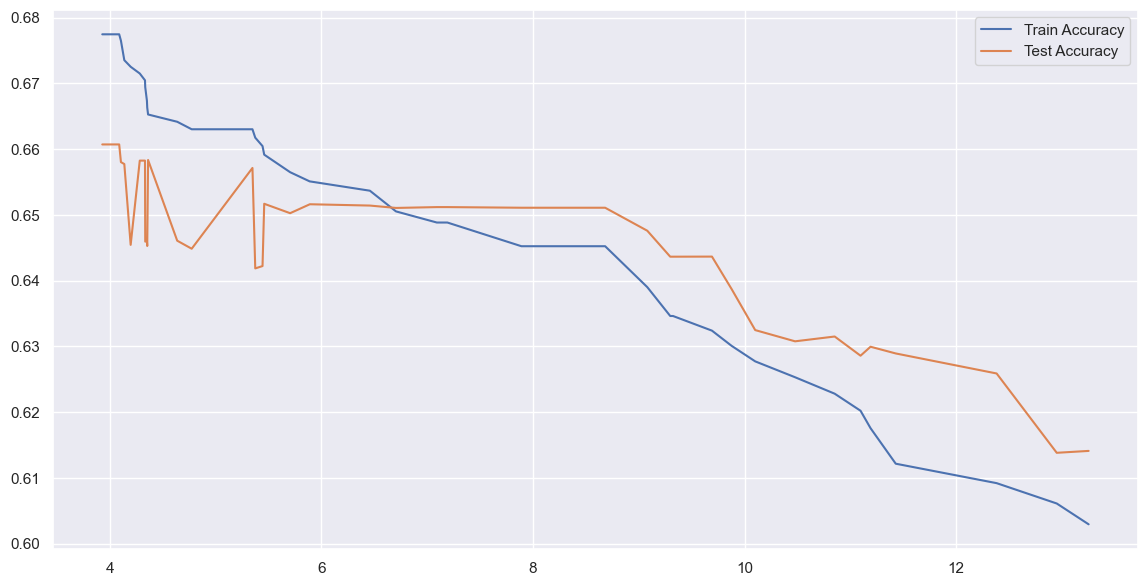

In [104]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas[1550:1590],label='Train Accuracy')
sns.lineplot(y=accuracy_test,x=alphas[1550:1590],label='Test Accuracy')
#plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

# Best ccp_alpha is between 6-8

In [105]:
from sklearn.ensemble import ExtraTreesRegressor

In [106]:
dt3=ExtraTreesRegressor(ccp_alpha=6)
dt3.fit(x3_train, y3_train)
#trainpred=dt3.predict(x3_train)
#testpred=dt3.predict(x3_test)

training_score4=dt3.score( x3_train,y3_train)
test_score4=dt3.score( x3_test,y3_test)
#mse3=mean_squared_error(x3_test,testpred)
print(training_score4,test_score4)

0.672624644411504 0.6664092170680501
